In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset: Stanford Open Policing Project


In [3]:
import pandas as pd

In [4]:
# ri stands for Rhode Island
ri = pd.read_csv(r'C:\Users\other user\Downloads\police\police.csv') 

In [5]:
# what does each row represent?
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
# what do these numbers mean?
ri.shape 

(91741, 15)

In [7]:
# what do these types mean?
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [8]:
# what are these counts? how does this work?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [9]:
2 == True

False

In [10]:
(True == 1) and (False == 0)

True

## 1. Remove the column that only contains missing values

In [11]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

In [12]:
ri.shape

(91741, 14)

In [13]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [14]:
# alternative method
ri.dropna(axis='columns', how='all').shape

(91741, 14)

## 2. Do men or women speed more often? 

In [15]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].\
driver_gender.value_counts(normalize=True)*100

M    68.052661
F    31.947339
Name: driver_gender, dtype: float64

In [16]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].\
value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [17]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True, dropna = False)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [18]:
# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True, dropna = False)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [19]:
# combines the two lines above
ri.groupby('driver_gender').\
    violation.\
    value_counts(normalize=True).index

MultiIndex([('F',            'Speeding'),
            ('F',    'Moving violation'),
            ('F',           'Equipment'),
            ('F', 'Registration/plates'),
            ('F',               'Other'),
            ('F',           'Seat belt'),
            ('M',            'Speeding'),
            ('M',    'Moving violation'),
            ('M',           'Equipment'),
            ('M',               'Other'),
            ('M', 'Registration/plates'),
            ('M',           'Seat belt')],
           names=['driver_gender', 'violation'])

## 3. Does gender affect who gets searched during a stop?

In [20]:
# ignore gender for the moment
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [21]:
# how does this work?
ri.search_conducted.mean()

0.03483720473942948

In [22]:
# search rate by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?

In [23]:
# include a second factor
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

## 4. Why is search_type missing so often?

In [24]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [25]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [26]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].violation.value_counts()

Speeding               47506
Moving violation       15329
Equipment              10316
Other                   4107
Registration/plates     3098
Seat belt               2856
Name: violation, dtype: int64

In [27]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [28]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [29]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

## 5. During a search, how often is the driver frisked?

In [30]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [31]:
# use bracket notation when creating a column
ri['frisk'] = ri.search_type == 'Protective Frisk'

In [32]:
ri.frisk.dtype

dtype('bool')

In [33]:
# includes exact matches only
ri.frisk.sum()

161

In [34]:
# is this the answer?
ri.frisk.mean()

0.0017549405391264537

In [35]:
# uses the wrong denominator (includes stops that didn't involve a search)
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [36]:
161 / (91580 + 161)

0.0017549405391264537

In [37]:
# includes partial matches
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [38]:
# seems about right
ri.frisk.sum()

274

In [39]:
# frisk rate during a search
ri.frisk.mean()

0.08573216520650813

In [40]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [41]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

## 6. Which year had the least number of stops? 

In [42]:
# this works, but there's a better way
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [43]:
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [44]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [45]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

## 7. How does drug activity change by time of day?

In [46]:
ri.drugs_related_stop.dtype

dtype('bool')

In [47]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

In [48]:
# can't groupby 'hour' unless you create it as a column
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

<AxesSubplot:xlabel='stop_datetime'>

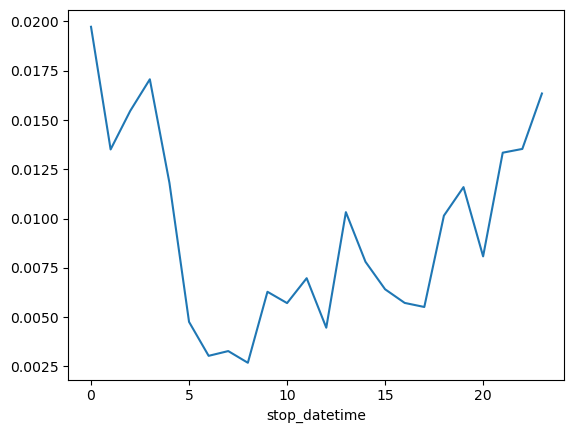

In [49]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).\
    drugs_related_stop.\
    mean().plot()

## 8. Do most stops occur at night? 

In [51]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

<AxesSubplot:>

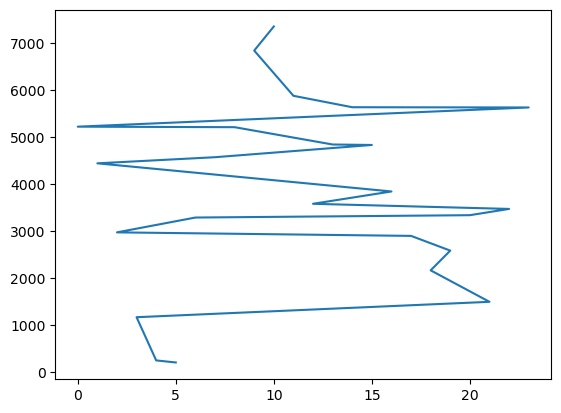

In [52]:
ri.stop_datetime.dt.hour.value_counts().plot()

<AxesSubplot:>

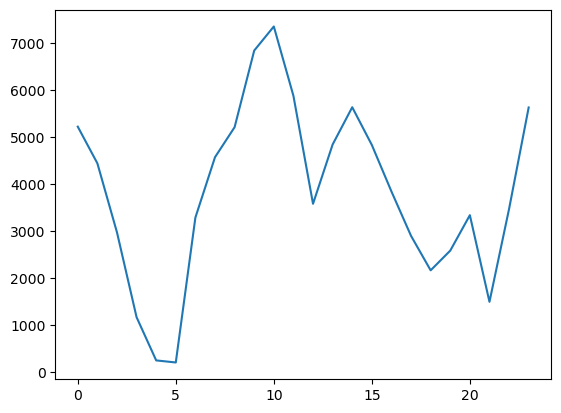

In [53]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

<AxesSubplot:xlabel='stop_datetime'>

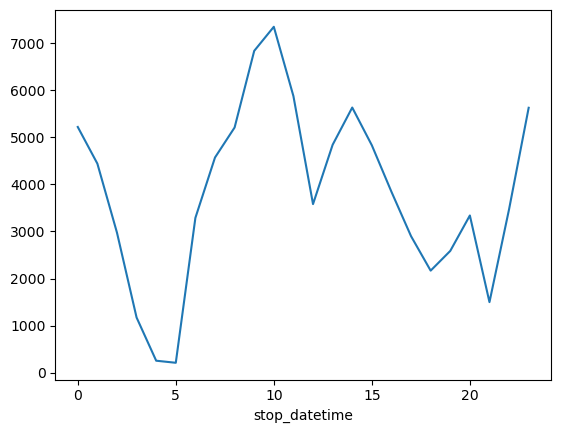

In [54]:
# alternative method
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

## 9. Find the bad data in the stop_duration column and fix it

In [55]:
# mark bad data as missing
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [56]:
# what four things are wrong with this code?
# ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

In [57]:
# what two things are still wrong with this code?
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\other user\AppData\Local\Temp\ipykernel_10944\415579359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'


In [58]:
# assignment statement did not work
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [59]:
# solves SettingWithCopyWarning
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [60]:
# confusing!
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [61]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [62]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [63]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

## 10. What is the mean stop_duration for each violation_raw?

In [64]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [65]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [66]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [67]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


## 11. Plot the results of the first groupby from the previous exercise

<AxesSubplot:xlabel='violation_raw'>

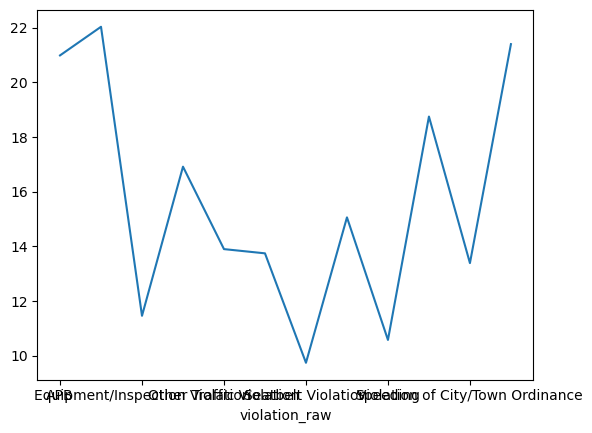

In [68]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

<AxesSubplot:xlabel='violation_raw'>

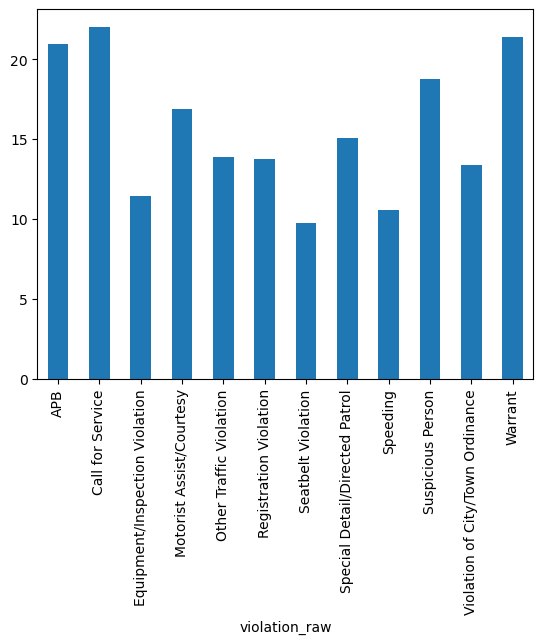

In [69]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

<AxesSubplot:ylabel='violation_raw'>

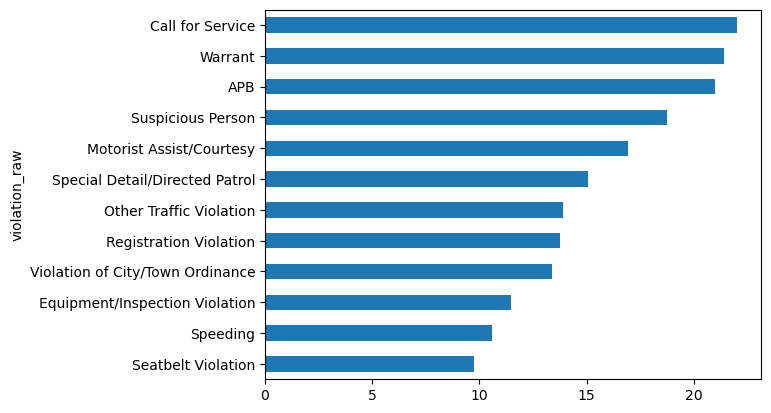

In [70]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

## 12. Compare the age distributions for each violation

In [71]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


<AxesSubplot:ylabel='Frequency'>

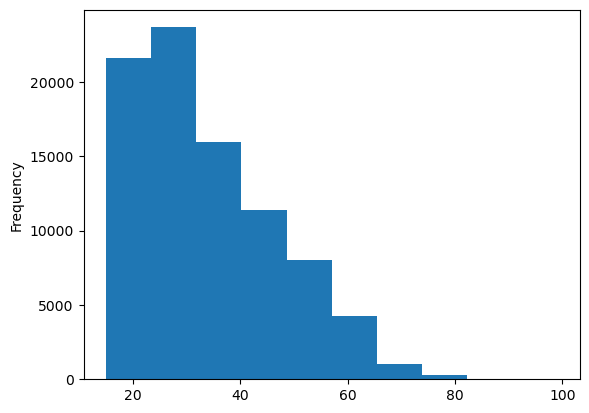

In [72]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

<AxesSubplot:>

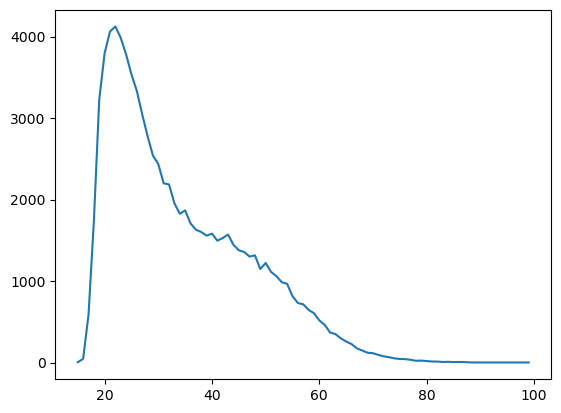

In [73]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

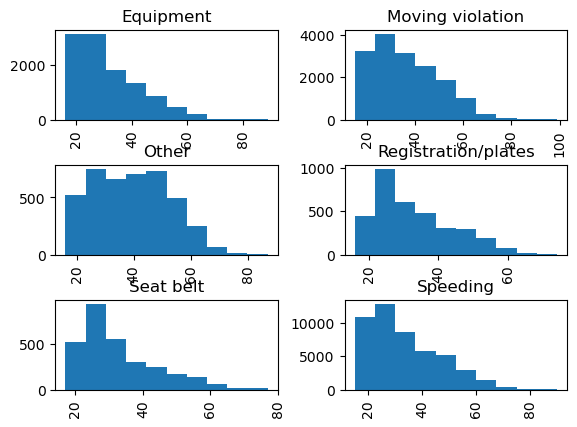

In [74]:
# can't use the plot method
ri.hist('driver_age', by='violation')

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

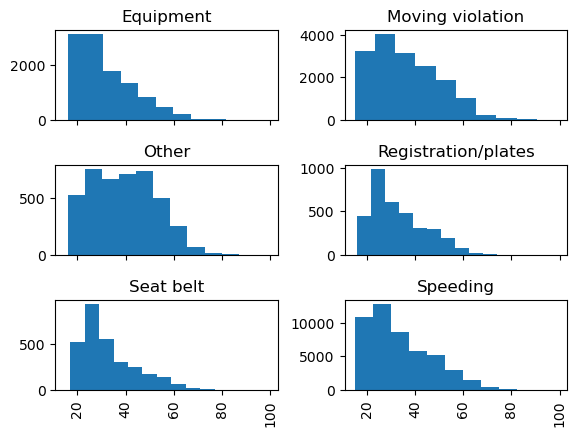

In [75]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True)

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

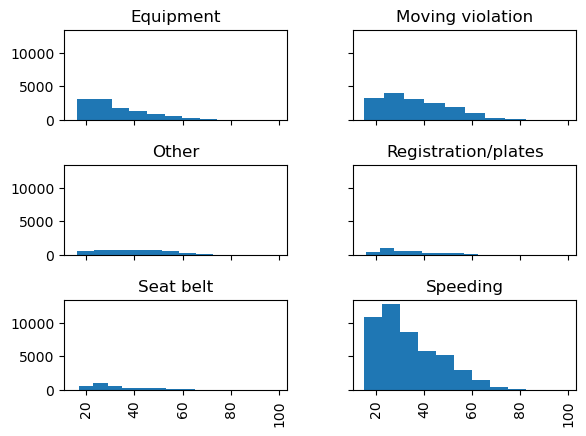

In [76]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [77]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


In [78]:
# appears to be year of stop_date minus driver_age_raw
ri.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 22:46:00,8.0


In [79]:
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

array([[<AxesSubplot:title={'center':'driver_age'}>,
        <AxesSubplot:title={'center':'new_age'}>]], dtype=object)

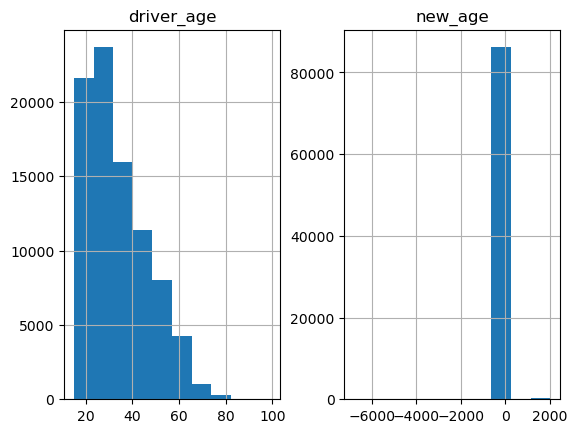

In [80]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()

In [81]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [82]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape

(294, 18)

In [83]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [84]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [85]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [86]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [87]:
# set the ages outside that range as missing
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [88]:
ri.new_age.equals(ri.driver_age)

True

In [89]:
ri.to_csv(r'C:\Users\other user\Downloads\police\police.csv')